In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using LinearAlgebra
using StatsPlots
using StatsBase
using Distances

In [2]:
pdir = plotsdir("supp01_8x14data")
mkpath(pdir)

"/Users/ben/projects/Doran_etal_2022/plots/supp01_8x14data"

In [3]:
heatmapcols = [:purple, :black, :yellow];
generationcols = ["#B3D2FC" "#2B689E" "#338591"];

In [4]:
M = Float64.([
    0 1 0 1 1 1 0 1 1 1 1 1 1 1;
    0 1 0 1 1 1 1 0 1 1 1 1 1 1;
    0 1 1 0 1 1 1 1 0 1 1 1 1 1;
    0 1 1 0 1 1 1 1 1 0 1 1 1 1;
    1 0 1 1 0 1 1 1 1 1 0 1 1 1;
    1 0 1 1 0 1 1 1 1 1 1 0 1 1;
    1 0 1 1 1 0 1 1 1 1 1 1 0 1;
    1 0 1 1 1 0 1 1 1 1 1 1 1 0;
]);

In [5]:
usv = svd(M);

In [6]:
S = diagm(usv.S)
S[S.==0.0] .= NaN;

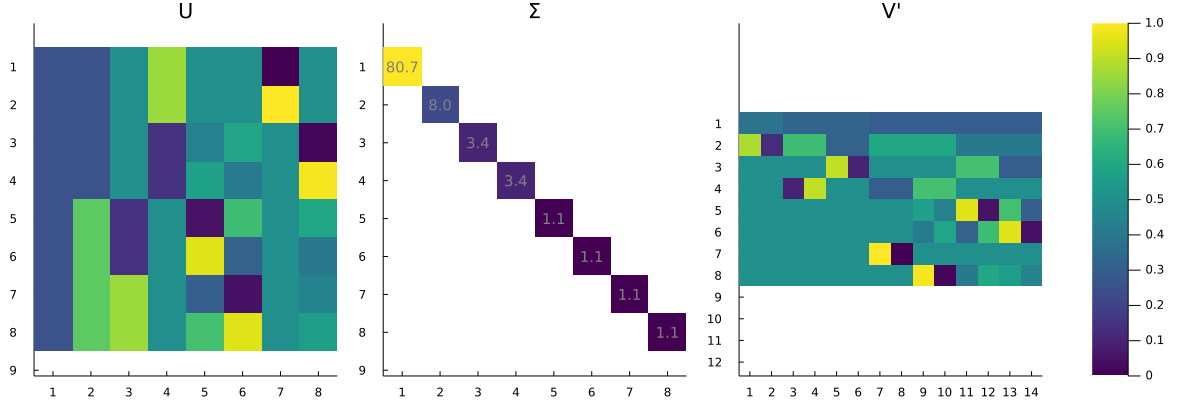

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [8]:
l = @layout [a b c d{0.1w}]
plot(layout=l, size=(1200, 400), ratio=1, ticks=1:14, yflip=true, grid=false, colorbar=:none)
heatmap!(usv.U, c=:viridis, sp=1, title="U")
heatmap!(S, c=:viridis, sp=2, title="Σ")
fracvar = round.((usv.S.^2)/sum(usv.S.^2)*100, digits=1);
annotate!(1:8, 1:8, text.(string.(fracvar), 10, :grey),  sp=2)
heatmap!(usv.Vt, c=:viridis, sp=3, title="V'")
plot!([0], line_z=[0,1], c=:viridis, ratio=:auto, colorbar=true, frame=:none, label="", sp=4)

In [9]:
savefig(joinpath(pdir, "SVDdecomp_of_8x14data.svg"))

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


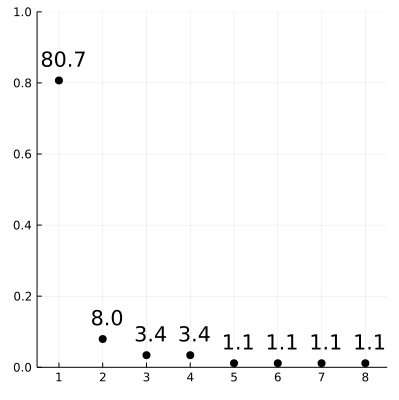

In [10]:
scatter((usv.S.^2)/sum(usv.S.^2), xticks=1:14, c=:black, markersize=5, legend=:none, ylims=(0,1), xlims=(.5,8.5), size=(400,400))
annotate!((1:length(usv.S)) .+ .1 , (usv.S.^2)/sum(usv.S.^2).+.06, round.((usv.S.^2)/sum(usv.S.^2)*100, digits=1))

In [11]:
savefig(joinpath(pdir, "fractionalvarianceof8x14.svg"))

# Plot paired distances

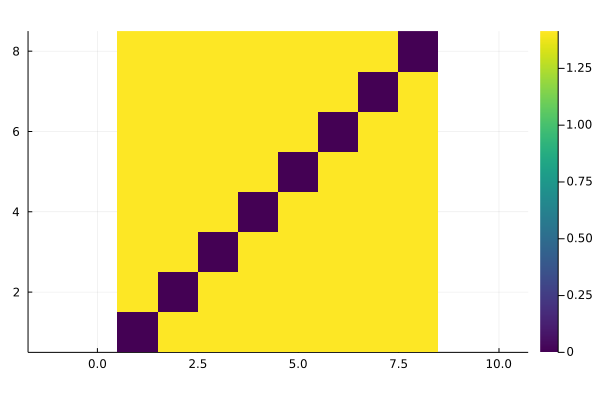

In [12]:
# basic Euclidean distance
Dij_euclidean = Distances.pairwise(Euclidean(), usv.U')
heatmap(Dij_euclidean, c=:viridis, ratio=1)

In [13]:
savefig(joinpath(pdir, "basiceuclideandistance.svg"))

plot spectral divergences

In [24]:
# using SCALES
# spires = SCALES.pairwise(SCALES.SpectralResiduals(), usv.U') 
using SPI
spires = calc_spi_trace(usv, groups=[i:i for i in 1:8])
spires = mapslices(cumsum, spires, dims=1)

8×28 Matrix{Float64}:
 4.8341e-16   3.22274e-16  3.22274e-16  …  0.0          0.0
 1.11546e-15  7.73739e-16  5.93153e-16     3.61173e-16  2.70879e-16
 1.36113e-15  1.07847e-15  6.37473e-16     1.31607      1.87813e-15
 2.01864e-15  1.31607      1.31607         1.31607      2.38953e-15
 2.48938e-15  1.41298      1.41298         1.66942      0.572057
 2.63818e-15  1.53605      1.53605      …  2.58051      1.8568
 1.41421      2.24316      2.24316         2.58051      1.8568
 1.41421      2.9327       2.9327          2.79279      2.00572

In [25]:
## Plot SPI cumsum pairs by generation
trilmask = tril(trues(size(usv.U)),-1)
F1mask = Bool.(kron([0 0; 1 0],[1 1;1 1], [1 1;1 1]))
F2mask = Bool.(kron([1 0; 0 1], [0 0; 1 0], [1 1; 1 1] ))
F3mask = Bool.(kron([1 0; 0 1],[1 0; 0 1], [0 0; 1 0]));

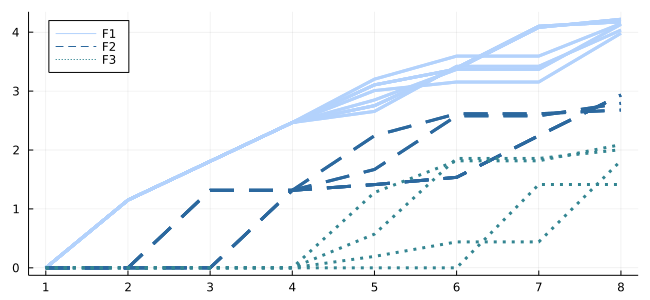

In [26]:

plot([0 0 0], 
    label=["F1" "F2" "F3"], 
    c=generationcols,
    linestyle=[:solid :dash :dot],
    size=(650, 300),
    legend=:topleft,
    xticks=1:8)
plot!(spires[:, F1mask[trilmask]],linewidth=3, c=generationcols[1],linestyle=:solid, label="")
plot!(spires[:, F2mask[trilmask]],linewidth=3, c=generationcols[2],linestyle=:dash,  label="")
plot!(spires[:, F3mask[trilmask]],linewidth=3, c=generationcols[3],linestyle=:dot,   label="")

In [27]:
savefig(joinpath(pdir, "spectral_residuals_trace_8x14.svg"))

In [28]:
partitioneddists = calc_spi_trace(usv.U, usv.S, [1:1, 2:2, 3:4, 5:8])
cumsumpdists = cumsum(partitioneddists, dims=1);

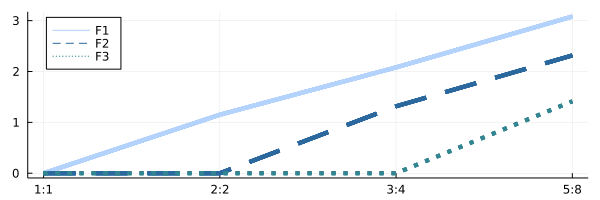

In [29]:
plot([0 0 0], 
    label=["F1" "F2" "F3"], 
    c=generationcols,
    linestyle=[:solid :dash :dot],
    legend=:topleft,
    linewidth=5,
    size=(600, 200),
    xticks=(1:4, ["1:1", "2:2", "3:4", "5:8"]))
plot!(cumsumpdists[:, F1mask[trilmask]], linewidth=4, c=generationcols[1],linestyle=:solid, label="")
plot!(cumsumpdists[:, F2mask[trilmask]], linewidth=4, c=generationcols[2],linestyle=:dash,  label="")
plot!(cumsumpdists[:, F3mask[trilmask]], linewidth=4, c=generationcols[3],linestyle=:dot,   label="")

In [30]:
savefig(joinpath(pdir, "partitioned_spectral_residuals_trace_8x14.svg"))

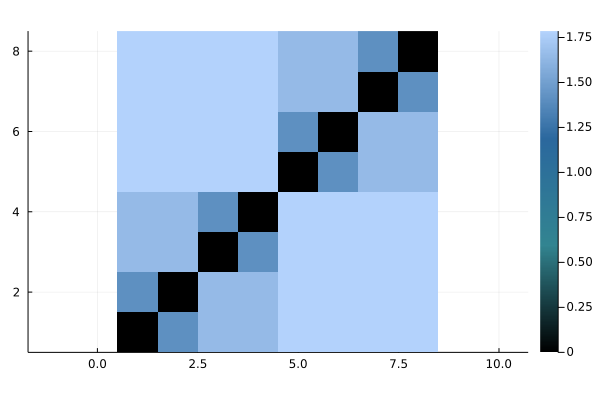

In [31]:
colors = [:black, reverse(generationcols)...]
heatmap(Distances.pairwise(WeightedEuclidean(usv.S), usv.U'), c=colors, ratio=1)

In [32]:
savefig(joinpath(pdir, "basic_weighted_euclideandistance_heatmap.svg"))

In [35]:
SPI.reshape_pairstodistancematrix(cumsumpdists[1,:])

8×8 Matrix{Float64}:
 0.0          4.8341e-16   3.22274e-16  …  0.0          0.0
 4.8341e-16   0.0          1.61137e-16     4.8341e-16   4.8341e-16
 3.22274e-16  1.61137e-16  0.0             3.22274e-16  3.22274e-16
 3.22274e-16  1.61137e-16  0.0             3.22274e-16  3.22274e-16
 3.22274e-16  1.61137e-16  0.0             3.22274e-16  3.22274e-16
 0.0          4.8341e-16   3.22274e-16  …  0.0          0.0
 0.0          4.8341e-16   3.22274e-16     0.0          0.0
 0.0          4.8341e-16   3.22274e-16     0.0          0.0

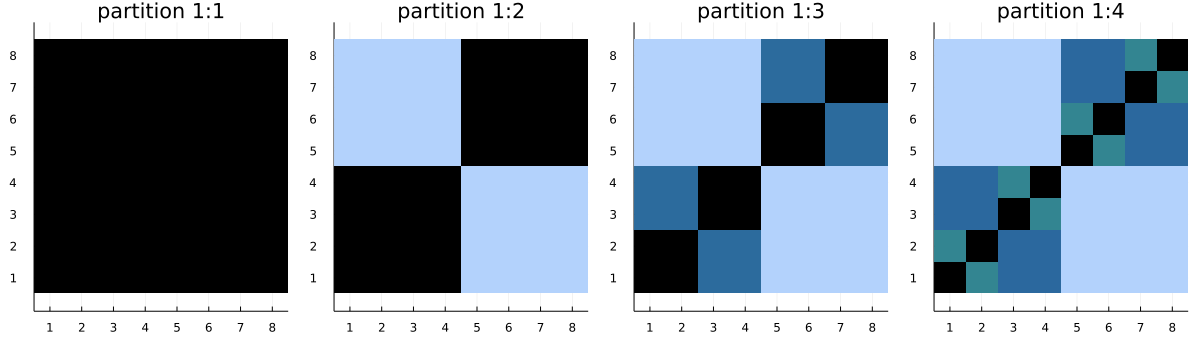

In [37]:
## Plot partitioned distance matrix (Partitioned Weighted Euclidean)
plot(layout=grid(1,4), size=(1200, 350), ratio=1, ticks=1:8, colorbar=:none, bottommargin=5Plots.Measures.mm)
heatmap!(trunc.(SPI.reshape_pairstodistancematrix(cumsumpdists[1,:]), digits=13), sp=1, c=colors, title="partition 1:1")
heatmap!(SPI.reshape_pairstodistancematrix(cumsumpdists[2,:]),sp=2, c=colors,title="partition 1:2")
heatmap!(SPI.reshape_pairstodistancematrix(cumsumpdists[3,:]),sp=3, c=colors,title="partition 1:3")
heatmap!(trunc.(Int,SPI.reshape_pairstodistancematrix(cumsumpdists[4,:])),sp=4, c=colors,title="partition 1:4")

In [39]:
savefig(joinpath(pdir, "SPIdistancematrices_cumulativepartitions.svg"))

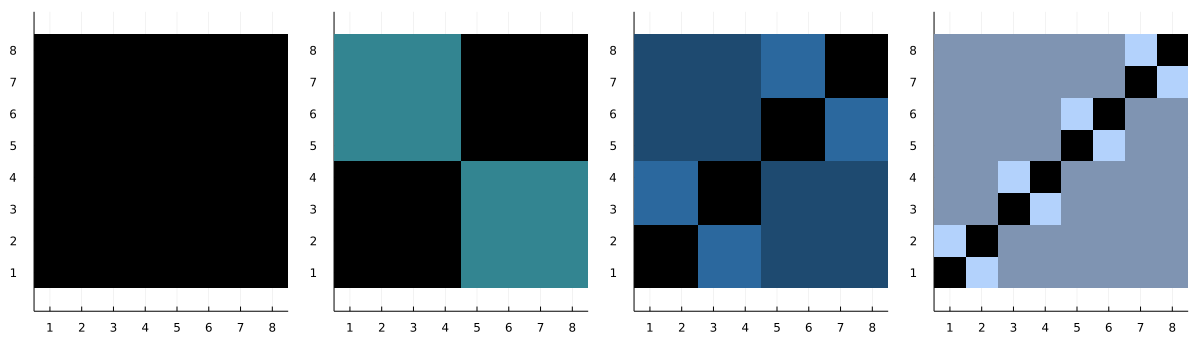

In [51]:

SPI.reshape_pairstodistancematrix(cumsumpdists[4,:])
## Plot partitioned distance matrix (SPI)
plot(layout=grid(1,4), size=(1200, 350), ratio=1, ticks=1:8, colorbar=:none, bottommargin=5Plots.Measures.mm)
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[1,:]),sp=1, c=:black)
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[2,:]),sp=2, c=[:black, colors[2]])
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[3,:]),sp=3, c=[:black, colors[3]])
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[4,:]),sp=4, c=[:black, colors[4]])

In [52]:
savefig(joinpath(pdir, "SPIdistancematrices_individualpartitions.svg"))

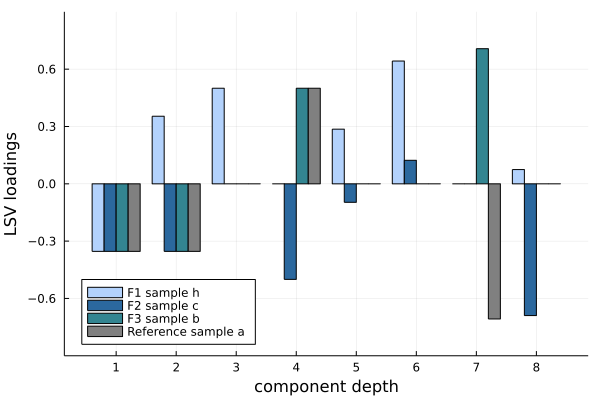

In [40]:
loadings = hcat(
    usv.U[1, :],
    usv.U[2, :],
    usv.U[3, :],
    usv.U[8, :],
)
gpairdist = repeat(["Reference sample a", "F3 sample b", "F2 sample c", "F1 sample h"], inner = 8)
gcolors = [generationcols... :grey]
plot(ylabel="LSV loadings", xlabel="component depth", xticks=1:8, ylims=(-.9, .9))
groupedbar!(loadings, group=gpairdist, legend=:bottomleft, c=gcolors)
# (usv.S[2:end].^2)/sum(usv.S[2:end].^2).*100

In [41]:
savefig(joinpath(pdir, "LSVloading_by_componentdepth_8x14data.svg"))

In [42]:
# # Partitioned Co-Variance
# M
# heatmap(cor(M),c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1)
# heatmap(cov(M),c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1)
# covVF = (usv.V * (diagm(usv.S).^2) * usv.Vt)/7
# heatmap(covVF, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# covVF = M'M/7
# heatmap(covVF, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1,clim=(-1,1))
# covVF1 = (usv.V[:, 2:2] * (diagm(usv.S[2:2]).^2) * usv.Vt[2:2, :])
# heatmap(covVF1, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# grp = 3:4
# covVF2 = (usv.V[:, grp] * (diagm(usv.S[grp]).^2) * usv.Vt[grp, :])
# heatmap(covVF2, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1,clim=(-1,1))
# grp = 5:8
# covVF3 = (usv.V[:, grp] * (diagm(usv.S[grp]).^2) * usv.Vt[grp, :])
# heatmap(covVF3, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# covVF3 = usv.V[:, 5:8] * diagm(usv.S[5:8]) * usv.Vt[5:8, :]
# heatmap(covVF3, c=[:blue, :black, :darkorange])